### Recreating Hoodline Bar Chart
Same code included in sf_crime_chart.py

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
sf_crime = gpd.read_file('sf_crime_data.shp')

In [3]:
sf_crime.head(2)

,city_key,incident_c,date,offense,latitude,longitude,geometry
0,SFO,73732706372,2018-11-11,Larceny/Theft,37.779992,-122.413487,POINT (37.780 -122.413)
1,SFO,76224509035,2018-11-11,Bad Checks,37.801481,-122.416133,POINT (37.801 -122.416)


In [4]:
sf_crime.tail(2)

,city_key,incident_c,date,offense,latitude,longitude,geometry
2462,SFO,73480006244,2018-11-05,Larceny/Theft,37.774599,-122.425888,POINT (37.775 -122.426)
2463,SFO,76928409020,2018-11-05,Counterfeiting/Forgery,37.776661,-122.412158,POINT (37.777 -122.412)


In [5]:
len(sf_crime)

2464

In [6]:
sf_crime.dtypes

city_key        object
incident_c      object
date            object
offense         object
latitude       float64
longitude      float64
geometry      geometry
dtype: object

In [7]:
crimes = sf_crime.offense.value_counts().index[:13]
crime_counts = sf_crime.offense.value_counts().values[:13]

In [8]:
crime_counts_df = pd.DataFrame({'Crime':crimes, 'Count':crime_counts})

In [9]:
crime_counts_df = crime_counts_df[crime_counts_df.Crime != 'Other']  # Removing 'Other' from chart
crime_counts_df

,Crime,Count
1,Larceny/Theft,739
2,Assault,177
3,Burglary/Breaking & Entering,133
4,Destruction of Property/Vandalism,128
5,Drugs,107
6,Motor Vehicle Theft,95
7,Fraud,71
8,Sex Offenses,57
9,Suspicious Activity,45
10,Trespassing,23


In [10]:
# Created chart via datawrapper (https://www.datawrapper.de/_/E0jaK/)
crime_counts_df.to_csv('sf_crime_counts_df.csv', index=False)

---

Altair Chart:

In [11]:
%run chart_theme.py

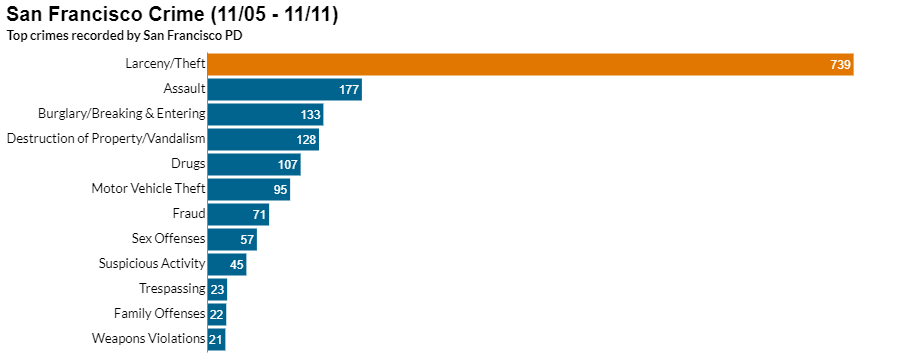

In [12]:
max_val = crime_counts_df.Count.max()

base = alt.Chart(crime_counts_df, title='San Francisco Crime (11/05 - 11/11)').encode(
x=alt.X('Count', axis=None),
y=alt.Y('Crime', title='Top crimes recorded by San Francisco PD', sort=list(crime_counts_df.Crime.values)))

bars = base.mark_bar(size=22).encode(color=alt.condition(
    alt.datum.Count == max_val,
    alt.value('#e17700'),
    alt.value('#00648e')))

text = base.mark_text(
    color='white',
    align='right',
    size=12,
    dx=-3
).encode(
    text='Count')

chart = bars + text
chart

In [13]:
chart.save('sf_crime.png', scale_factor=3)